# Variational Circuit Map Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
def spectrum_pipeline(spam_model, kraus_model, data, num_iter_spam, num_iter_map, N=None):
    d = spam_model.d
    kraus_model.spam = spam_model
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam_model.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                        num_iter = 300,
                        verbose = False,
                       )
    
    spam_model.train(inputs = inputs_spam,
                     targets = targets_spam,
                     num_iter = num_iter_spam,
                     verbose = False,
                    )
    
    model = ModelQuantumMap(
                            channel = kraus_model,
                            loss_function = ProbabilityMSE(),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                )
    
    spectrum = channel_spectrum(kraus_model)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

## Delay

In [3]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_noDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum1, circle, model1 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0014378532788345657


  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 0.4615479903087137
Step:1, train: 0.45762693669980753
Step:2, train: 0.45363704396652643
Step:3, train: 0.4496117692389157
Step:4, train: 0.4455627503305053
Step:5, train: 0.44149571461706255
Step:6, train: 0.4374140044317631
Step:7, train: 0.43331973229376725
Step:8, train: 0.42921417263753564
Step:9, train: 0.4250980628288509
Step:10, train: 0.4209717165087695
Step:11, train: 0.41683515120123477
Step:12, train: 0.41268815380689117
Step:13, train: 0.408530334536396
Step:14, train: 0.40436119272375753
Step:15, train: 0.4001801316855143
Step:16, train: 0.3959865029994941
Step:17, train: 0.3917796148178884
Step:18, train: 0.3875587736278156
Step:19, train: 0.3833232974318779
Step:20, train: 0.37907253076625413
Step:21, train: 0.3748058653587038
Step:22, train: 0.370522757062555
Step:23, train: 0.3662227203383686
Step:24, train: 0.3619053448859423
Step:25, train: 0.35757028775525046
Step:26, train: 0.35321728518159257
Step:27, train: 0.3488461597327859
Step:28, train: 0.344

Step:225, train: 0.023017888759315513
Step:226, train: 0.022991054456275927
Step:227, train: 0.022964712554366443
Step:228, train: 0.022938847117348695
Step:229, train: 0.022913442825664133
Step:230, train: 0.022888485073212644
Step:231, train: 0.022863959813361187
Step:232, train: 0.02283985356841653
Step:233, train: 0.022816153409043773
Step:234, train: 0.022792846942212824
Step:235, train: 0.02276992228133482
Step:236, train: 0.022747367984347015
Step:237, train: 0.02272517312426843
Step:238, train: 0.022703327162058112
Step:239, train: 0.02268181998532354
Step:240, train: 0.022660641899035303
Step:241, train: 0.02263978358021042
Step:242, train: 0.022619236055304862
Step:243, train: 0.022598990712140884
Step:244, train: 0.022579039283259963
Step:245, train: 0.0225593738015614
Step:246, train: 0.02253998662243486
Step:247, train: 0.022520870334887
Step:248, train: 0.02250201789100265
Step:249, train: 0.022483422444240328
Step:250, train: 0.02246507744055153
Step:251, train: 0.022446

Step:443, train: 0.02080611325849352
Step:444, train: 0.020801869304563896
Step:445, train: 0.02079764749193882
Step:446, train: 0.02079344767235535
Step:447, train: 0.0207892696765741
Step:448, train: 0.02078511335005591
Step:449, train: 0.02078097854502888
Step:450, train: 0.02077686509748123
Step:451, train: 0.020772772860224182
Step:452, train: 0.020768701685180125
Step:453, train: 0.02076465141484354
Step:454, train: 0.020760621909982853
Step:455, train: 0.020756613024301644
Step:456, train: 0.020752624608153428
Step:457, train: 0.020748656522259684
Step:458, train: 0.020744708619887187
Step:459, train: 0.020740780760733154
Step:460, train: 0.020736872813194213
Step:461, train: 0.020732984627106578
Step:462, train: 0.02072911607706512
Step:463, train: 0.020725267018088744
Step:464, train: 0.02072143732533206
Step:465, train: 0.020717626864658424
Step:466, train: 0.020713835503582034
Step:467, train: 0.020710063105061658
Step:468, train: 0.02070630955138111
Step:469, train: 0.02070

Step:661, train: 0.02022660712923722
Step:662, train: 0.020225002718824683
Step:663, train: 0.02022340461737908
Step:664, train: 0.020221812788452233
Step:665, train: 0.020220227207750067
Step:666, train: 0.020218647842490833
Step:667, train: 0.020217074668073425
Step:668, train: 0.020215507652301526
Step:669, train: 0.020213946769545917
Step:670, train: 0.020212391986677552
Step:671, train: 0.02021084327734608
Step:672, train: 0.020209300610135743
Step:673, train: 0.020207763961921147
Step:674, train: 0.02020623329956932
Step:675, train: 0.020204708596382983
Step:676, train: 0.0202031898285929
Step:677, train: 0.020201676963050502
Step:678, train: 0.0202001699747487
Step:679, train: 0.020198668834484988
Step:680, train: 0.020197173516422248
Step:681, train: 0.020195683993594653
Step:682, train: 0.020194200237395085
Step:683, train: 0.020192722224834793
Step:684, train: 0.020191249925385207
Step:685, train: 0.02018978331374297
Step:686, train: 0.020188322364259968
Step:687, train: 0.02

Step:879, train: 0.019987529823481596
Step:880, train: 0.01998680975290806
Step:881, train: 0.01998609217783501
Step:882, train: 0.019985377089316567
Step:883, train: 0.019984664477696944
Step:884, train: 0.019983954334631328
Step:885, train: 0.019983246648268872
Step:886, train: 0.01998254140887385
Step:887, train: 0.01998183860999757
Step:888, train: 0.01998113824047884
Step:889, train: 0.01998044029029855
Step:890, train: 0.019979744750089123
Step:891, train: 0.019979051610199097
Step:892, train: 0.01997836086287005
Step:893, train: 0.01997767249815077
Step:894, train: 0.01997698650878161
Step:895, train: 0.019976302881483707
Step:896, train: 0.019975621611518286
Step:897, train: 0.019974942688843693
Step:898, train: 0.019974266099903385
Step:899, train: 0.019973591841785338
Step:900, train: 0.019972919902267117
Step:901, train: 0.019972250276453968
Step:902, train: 0.01997158294925258
Step:903, train: 0.019970917915137398
Step:904, train: 0.019970255165721658
Step:905, train: 0.019

Step:1095, train: 0.019877049894392842
Step:1096, train: 0.019876700151295352
Step:1097, train: 0.01987635153574057
Step:1098, train: 0.01987600404434346
Step:1099, train: 0.019875657674693
Step:1100, train: 0.019875312421637783
Step:1101, train: 0.019874968281625726
Step:1102, train: 0.0198746252519521
Step:1103, train: 0.019874283325324774
Step:1104, train: 0.01987394250121593
Step:1105, train: 0.01987360277449744
Step:1106, train: 0.01987326414017281
Step:1107, train: 0.0198729265946869
Step:1108, train: 0.01987259013760313
Step:1109, train: 0.01987225476247862
Step:1110, train: 0.01987192046719234
Step:1111, train: 0.019871587245605046
Step:1112, train: 0.019871255095043464
Step:1113, train: 0.019870924010551766
Step:1114, train: 0.01987059399081727
Step:1115, train: 0.019870265030392138
Step:1116, train: 0.01986993712555512
Step:1117, train: 0.01986961027397909
Step:1118, train: 0.019869284470938373
Step:1119, train: 0.01986895971497235
Step:1120, train: 0.019868635999866584
Step:

Step:1308, train: 0.019822843697766022
Step:1309, train: 0.019822664882392985
Step:1310, train: 0.019822486616277453
Step:1311, train: 0.01982230889712734
Step:1312, train: 0.019822131724027466
Step:1313, train: 0.01982195509402271
Step:1314, train: 0.019821779006054308
Step:1315, train: 0.019821603458817196
Step:1316, train: 0.019821428449860592
Step:1317, train: 0.01982125397683741
Step:1318, train: 0.019821080038482746
Step:1319, train: 0.019820906633544362
Step:1320, train: 0.019820733759753233
Step:1321, train: 0.019820561415344603
Step:1322, train: 0.01982038959995698
Step:1323, train: 0.019820218309067477
Step:1324, train: 0.019820047543168955
Step:1325, train: 0.01981987729934918
Step:1326, train: 0.019819707577218588
Step:1327, train: 0.019819538373625
Step:1328, train: 0.019819369687703866
Step:1329, train: 0.019819201518001293
Step:1330, train: 0.019819033862682956
Step:1331, train: 0.019818866719390076
Step:1332, train: 0.019818700086758984
Step:1333, train: 0.0198185339634

Step:1521, train: 0.019794751160741638
Step:1522, train: 0.01979465703728902
Step:1523, train: 0.01979456319123263
Step:1524, train: 0.019794469622973487
Step:1525, train: 0.01979437633004924
Step:1526, train: 0.01979428331237931
Step:1527, train: 0.019794190568662925
Step:1528, train: 0.019794098098789664
Step:1529, train: 0.01979400590085411
Step:1530, train: 0.01979391397494487
Step:1531, train: 0.01979382231998007
Step:1532, train: 0.01979373093434619
Step:1533, train: 0.019793639818445525
Step:1534, train: 0.019793548970268138
Step:1535, train: 0.019793458389883826
Step:1536, train: 0.019793368075966097
Step:1537, train: 0.019793278027960513
Step:1538, train: 0.01979318824514412
Step:1539, train: 0.019793098725955555
Step:1540, train: 0.019793009470595223
Step:1541, train: 0.019792920477106107
Step:1542, train: 0.019792831745651177
Step:1543, train: 0.01979274327475966
Step:1544, train: 0.019792655064243922
Step:1545, train: 0.019792567112819928
Step:1546, train: 0.019792479419544

Step:1733, train: 0.019779852664083167
Step:1734, train: 0.019779801771310206
Step:1735, train: 0.019779751023511188
Step:1736, train: 0.019779700419648626
Step:1737, train: 0.019779649959738917
Step:1738, train: 0.019779599642863164
Step:1739, train: 0.019779549468738028
Step:1740, train: 0.019779499437731694
Step:1741, train: 0.019779449547949142
Step:1742, train: 0.019779399800214245
Step:1743, train: 0.019779350193647884
Step:1744, train: 0.019779300727710083
Step:1745, train: 0.01977925140193392
Step:1746, train: 0.019779202216709993
Step:1747, train: 0.0197791531707308
Step:1748, train: 0.01977910426361891
Step:1749, train: 0.01977905549568377
Step:1750, train: 0.019779006865236218
Step:1751, train: 0.019778958373060245
Step:1752, train: 0.0197789100185825
Step:1753, train: 0.019778861800343488
Step:1754, train: 0.019778813719200372
Step:1755, train: 0.019778765774341484
Step:1756, train: 0.01977871796500313
Step:1757, train: 0.01977867029049908
Step:1758, train: 0.01977862275134

Step:1946, train: 0.01977168559375171
Step:1947, train: 0.01977165750884115
Step:1948, train: 0.019771629500894648
Step:1949, train: 0.0197716015693858
Step:1950, train: 0.019771573713709092
Step:1951, train: 0.019771545934025542
Step:1952, train: 0.019771518229934944
Step:1953, train: 0.01977149060179201
Step:1954, train: 0.01977146304919613
Step:1955, train: 0.019771435571534907
Step:1956, train: 0.019771408169031394
Step:1957, train: 0.019771380840741405
Step:1958, train: 0.01977135358697189
Step:1959, train: 0.019771326407838363
Step:1960, train: 0.019771299302535503
Step:1961, train: 0.019771272270778014
Step:1962, train: 0.019771245312788076
Step:1963, train: 0.019771218428155535
Step:1964, train: 0.019771191616613
Step:1965, train: 0.019771164878554646
Step:1966, train: 0.019771138212958204
Step:1967, train: 0.019771111620106252
Step:1968, train: 0.019771085098996596
Step:1969, train: 0.01977105865039082
Step:1970, train: 0.019771032273792694
Step:1971, train: 0.0197710059682746

In [4]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_2point5usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum2, circle, model2 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

FileNotFoundError: [Errno 2] No such file or directory: '../../data/threeQubits_variational_2point5usDelay_manila.p'

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_5usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum3, circle, model3 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_10usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum4, circle, model4 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


NameError: name 'spectrum3' is not defined

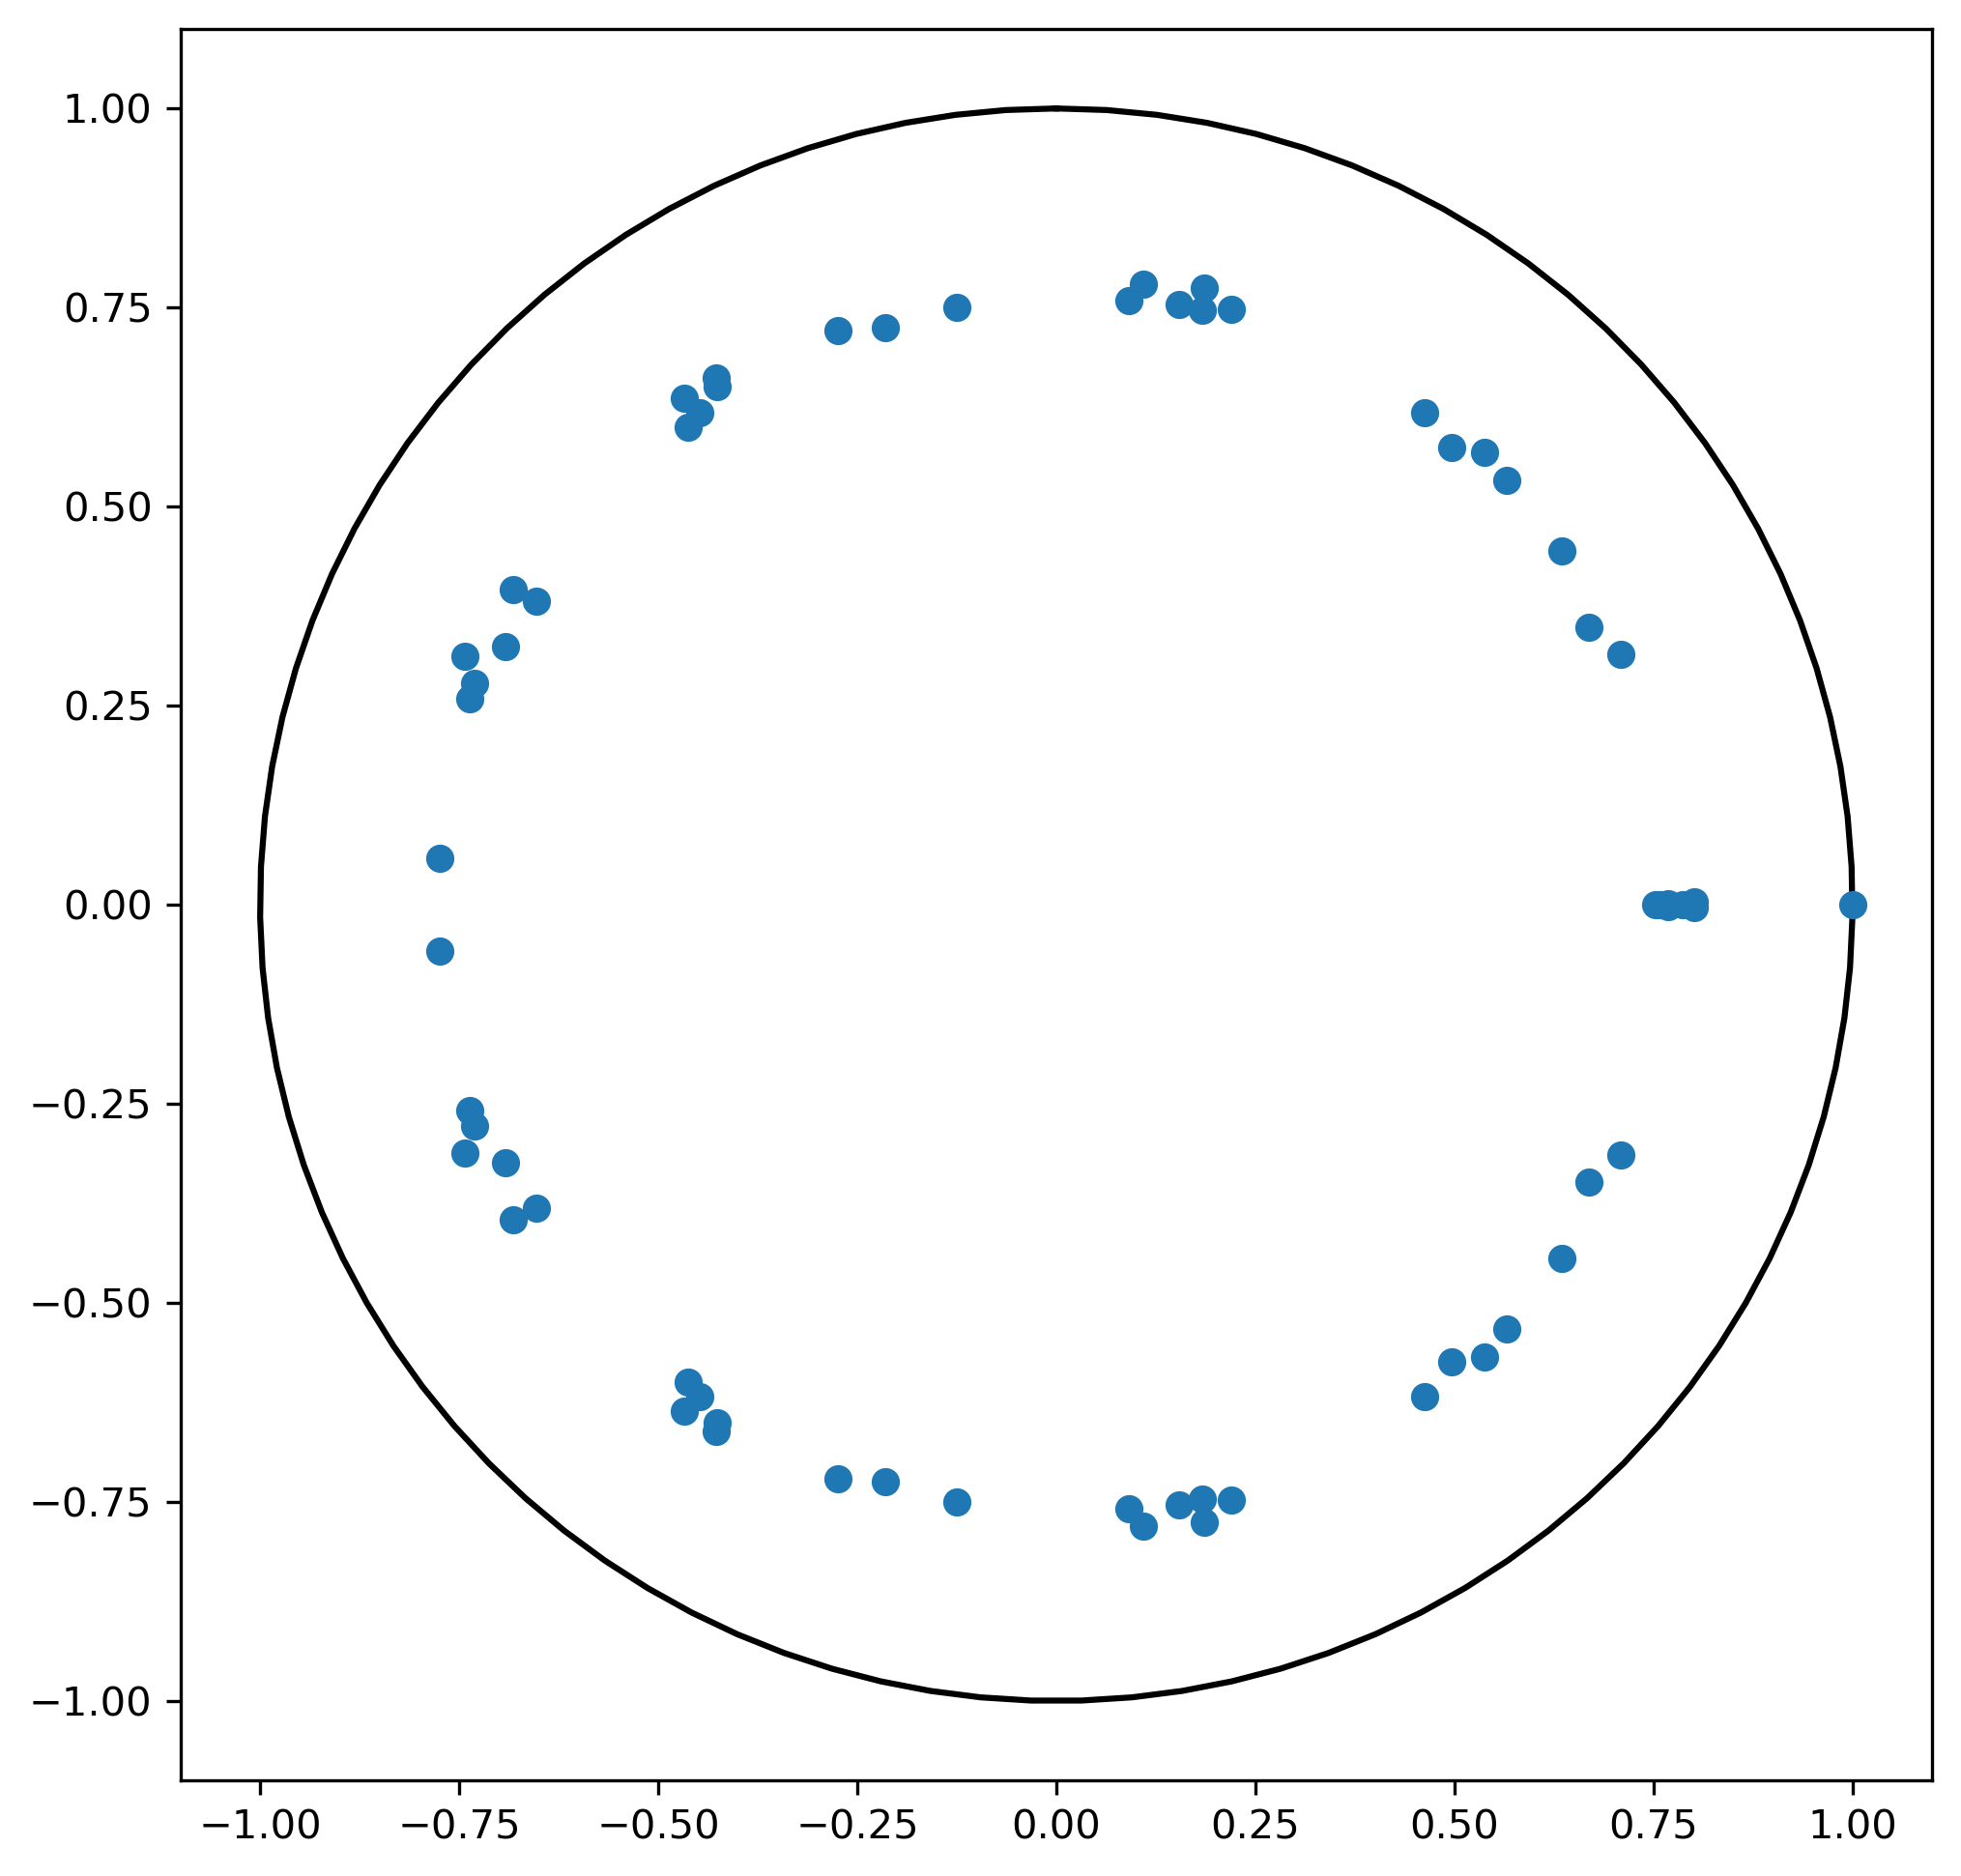

In [6]:
circle = np.array(circle)

fig =plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
#plt.plot(spectrum2[:,0], spectrum2[:,1], "o")
plt.plot(spectrum3[:,0], spectrum3[:,1], "o")
#plt.plot(spectrum4[:,0], spectrum4[:,1], "o")

plt.plot(*0.66*circle, "k")
plt.plot(*0.58*circle, "k")

plt.plot(*0.25*circle, "k")

plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 10us"])
plt.show()

In [ ]:
rank_eff_list = [effective_rank(model1.channel), effective_rank(model2.channel), effective_rank(model3.channel), effective_rank(model4.channel)]

fig=plt.figure(dpi = 300, facecolor='w', edgecolor='k')
plt.plot([0, 2.5, 5, 10], rank_eff_list, "o-")
plt.xlabel("Delay in mu seconds")
plt.ylabel("Effective Rank")
plt.show()

In [ ]:
np.random.seed(42)

A = np.random.normal(0,1,(8,8))
B = np.random.normal(0,1,(8,8))

G = A 
H = G + G.T.conj()

eig, eigvec = np.linalg.eig(H)
print(eig)
gs_index = np.argmin(eig)
gs = eigvec[:,gs_index].reshape(-1,1)


In [ ]:
gs = np.abs(np.random.normal(0,1,(4,1)))
gs = gs/np.sum(gs**2)
H = H - 1.1*gs.T@gs

eig, eigvec = np.linalg.eig(H)
print(eig)

gs_index = np.argmin(eig)
gs = eigvec[:,gs_index].reshape(-1,1)
print(gs)